# Pymaceuticals Analysis

In [1]:
#introduce dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

#%pwd

In [2]:
#set paths
mouse_data = ("Starter_Code\Pymaceuticals\data\Mouse_metadata.csv")
study_results = ("Starter_Code\Pymaceuticals\data\Study_results.csv")

#read csv files with Pandas
mouse_data_df = pd.read_csv(mouse_data)
study_results_df = pd.read_csv(study_results)

#join files into single DataFrame
mouse_SCC_study_df = pd.merge(study_results_df, mouse_data_df, how = "left", on = ["Mouse ID"])
mouse_SCC_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
#use pd.unique and len to get number of mice in combined DataFrame
mouse_count = len(pd.unique(mouse_SCC_study_df["Mouse ID"]))
mouse_count

249

In [4]:
#check each row for duplicates
dup = mouse_SCC_study_df.duplicated(subset=["Mouse ID", "Timepoint"])
#pull only the duplicate
dup_only = mouse_SCC_study_df.loc[dup, "Mouse ID"].unique()
dup_only

array(['g989'], dtype=object)

In [5]:
#pull all data for duplicate mouse
#use code to find duplicate but keep data
dup_data = mouse_SCC_study_df.duplicated(subset=["Mouse ID", "Timepoint"], keep = False)
dup_complete_data = mouse_SCC_study_df[dup_data] 
dup_complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [6]:
#filter data to exclude rows in dup_only (duplicate rows)
clean_mouse_SSC_df = mouse_SCC_study_df[mouse_SCC_study_df['Mouse ID'].isin(dup_only)==False]
clean_mouse_SSC_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
#number of mice without duplicate mouse entry
len(clean_mouse_SSC_df["Mouse ID"].unique())

248

In [8]:
#set variables grouped by drug regimen for requested stats
mean = clean_mouse_SSC_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_mouse_SSC_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_mouse_SSC_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdev = clean_mouse_SSC_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
standard_error = clean_mouse_SSC_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#create DataFrame with above variables
summary_stats_df = pd.DataFrame({
    "Mean of Tumor Volume": mean,
    "Median of Tumor Volume": median,
    "Variance of Tumor Volume": variance,
    "Standard Deviation of Tumor Volume": stdev,
    "Standard Error of Tumor Volume Mean": standard_error
})
#format
summary_stats_df = summary_stats_df.round(2)
#display results
summary_stats_df

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard Error of Tumor Volume Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


# Bar Charts of Statistics

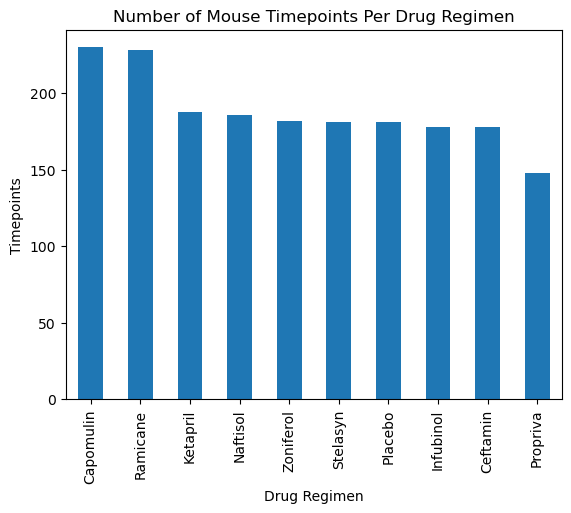

In [9]:
#find the count for each drug regimen in the DataFrame
count = clean_mouse_SSC_df["Drug Regimen"].value_counts()

#create a bar chart with pandas showing timepoints per drug regimen
count.plot(kind="bar", title="Number of Mouse Timepoints Per Drug Regimen", xlabel="Drug Regimen", ylabel="Timepoints")
plt.show()
#plt.show() is necessary for display, even if using pandas

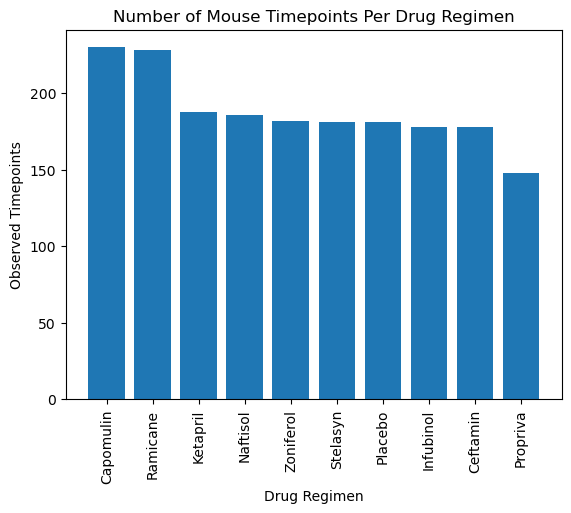

In [10]:
#Create a bar chart with pyplot showing timepoints per drug regimen
plt.bar(count.index, count.values)
plt.title("Number of Mouse Timepoints Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Observed Timepoints")
#make drug labels pretty
plt.xticks(rotation="vertical")
plt.show()

# Pie Charts of Statistics

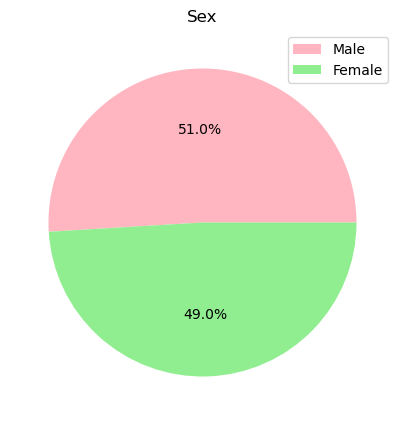

In [11]:
#find the count for each sex in the DataFrame
gender_data = clean_mouse_SSC_df["Sex"].value_counts()
colors = ["lightpink", "lightgreen"]
title= "Sex"
#create a pie chart with pandas showing female v male count
#ylabel='' to remove "count" title
#labeldistance=none to remove unnecessary labeling
gender_data.plot(kind="pie", ylabel=(''), colors=colors, figsize=(5,5), autopct="%.1f%%", title=title, legend=True, labeldistance=None)
plt.show()

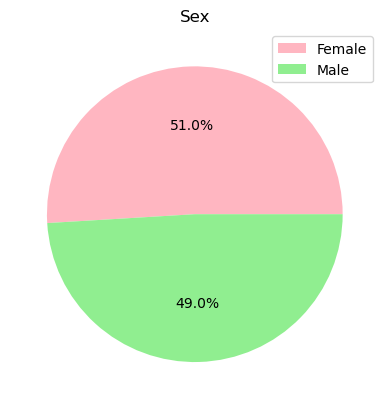

In [12]:
#create a pie chart with pyoplot showing female v male count
plt.pie(gender_data, colors=colors, labels=["Female", "Male"], autopct="%.1f%%", labeldistance=None)
plt.title("Sex")
plt.legend()
plt.show()

# Final Tumor Volume Statistics

In [13]:
# Calculate the final tumor volume of mice given specified treatment regimens
#use max to get final(greatest) timepoint
final_timepoint = clean_mouse_SSC_df.groupby(["Mouse ID"])["Timepoint"].max()
final_timepoint = final_timepoint.reset_index()
#merge with cleaned df
final_timepoint_merged = final_timepoint.merge(clean_mouse_SSC_df, on=["Mouse ID", "Timepoint"], how ="left")
final_timepoint_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
#create list of requested drugs
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#create empty list
tumor_vol_data = []
#for loop for each drug
for drug in treatments:
    #locate rows related to individual treatment
    final_tumor_size = final_timepoint_merged.loc[final_timepoint_merged["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    #add set within (subset) to hold tumor volume per drug
    tumor_vol_data.append(final_tumor_size)

    #calculate quartiles
    quarts = final_tumor_size.quantile([.25, .50, .75])
    #find upper and lower bounds to detect potential outliers
    lower = quarts[0.25]
    upper = quarts[0.75]
    #interquartile range
    iqr = upper-lower
    #complete calculations
    lower_bound = lower - 1.5*iqr
    upper_bound = upper + 1.5*iqr
    oddballs = final_tumor_size[(final_tumor_size<lower_bound) | (final_tumor_size>upper_bound)]
    #show results for potential outliers
    print(f"{drug}'s potential outliers include: {oddballs}")

Capomulin's potential outliers include: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers include: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers include: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers include: Series([], Name: Tumor Volume (mm3), dtype: float64)


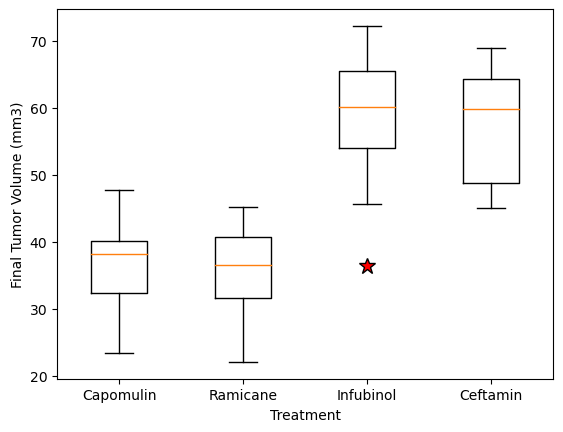

In [15]:
#set outlier to stand out
outlier = dict(markerfacecolor="red", marker="*", markersize=12)
#plot findings
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=outlier)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Treatment")
plt.show()

# Final Capomulin Statistics

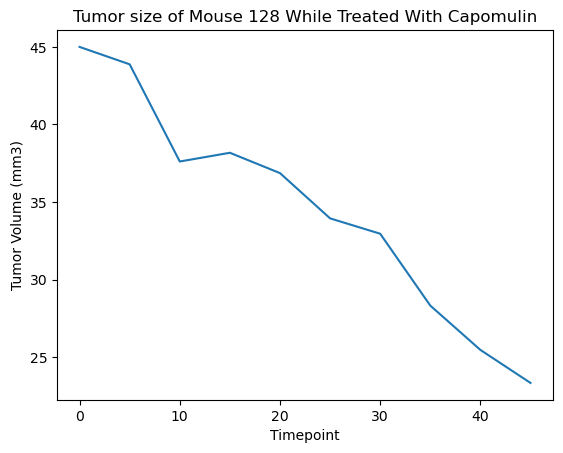

In [16]:
#create a line plot that shows a singular mouses progress on specified drug
#create df to hold capomulin mice data
capomulin_df = clean_mouse_SSC_df.loc[clean_mouse_SSC_df["Drug Regimen"]=="Capomulin"]
#select mouse
capomulin_mouse = capomulin_df.loc[capomulin_df["Mouse ID"]=="s185"]
#plot findings
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.title("Tumor size of Mouse 128 While Treated With Capomulin")
plt.show()

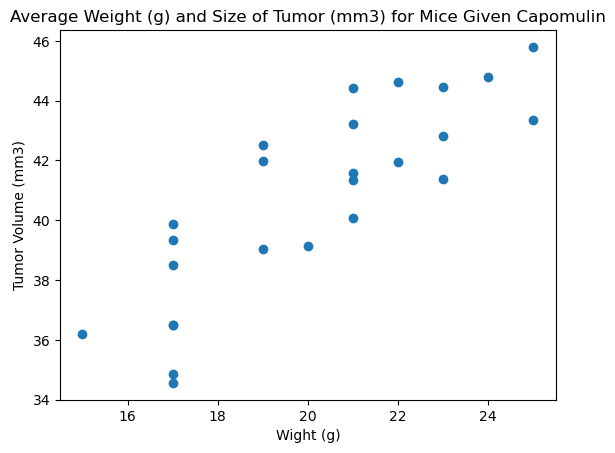

In [17]:
#create a scatter plot to show weight v tumor vol average for all mice given capomulin
#use df from above
capomulin_df = clean_mouse_SSC_df.loc[clean_mouse_SSC_df["Drug Regimen"]=="Capomulin"]
#calculate average tumor size
avg_tumor_size = capomulin_df.groupby(["Mouse ID"])[["Weight (g)","Tumor Volume (mm3)"]].mean()
#display findings
plt.scatter(avg_tumor_size["Weight (g)"], avg_tumor_size["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel('Wight (g)')
plt.title("Average Weight (g) and Size of Tumor (mm3) for Mice Given Capomulin")
plt.show()

The correlation between mouse weight (g) and Tumor Volume (mm3) for mice treated with Capomulins is: 0.84


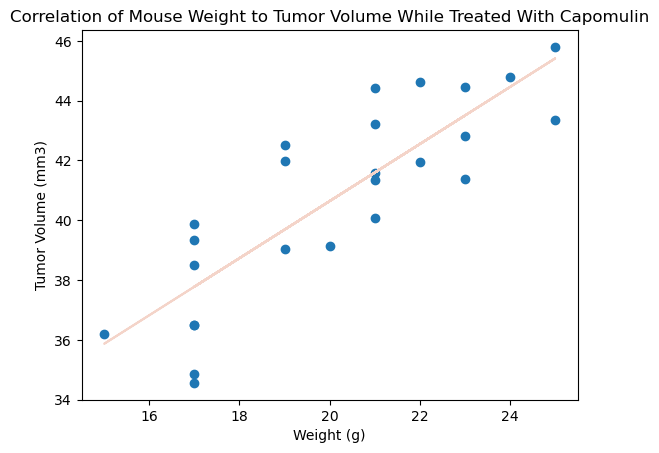

In [18]:
#calculate correlation of mouse weight and tumor volume of Capomulin Mice
#test non-correlation with "pearsonr"
#make results pretty with round
correlation = round(st.pearsonr(avg_tumor_size["Weight (g)"], avg_tumor_size["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight (g) and Tumor Volume (mm3) for mice treated with Capomulins is: {correlation}")

#calculate linear regression (y=mx+b)
regress = st.linregress(avg_tumor_size["Weight (g)"], avg_tumor_size["Tumor Volume (mm3)"])
y = avg_tumor_size["Weight (g)"]*regress[0]+regress[1]

#reiterate scatter plot and add regression line
plt.scatter(avg_tumor_size["Weight (g)"], avg_tumor_size["Tumor Volume (mm3)"])
#color for line regression inspired by "Pinky and the Brain"
plt.plot(avg_tumor_size["Weight (g)"], y, color = "#F4D4C9")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Correlation of Mouse Weight to Tumor Volume While Treated With Capomulin")
plt.show()